# Лабораторная работа №1
## Пункты 3.1, 3.2, 3.5

### Импортим либы

In [639]:
import random
import seaborn
import numpy as np
import pandas as pd
import math
import tabulate

### Настройки и вспомогательные функции 

In [640]:
random.seed(1)
BINS = 32
DEG=4 #from 1 to 10
N=10**DEG


def R() -> float:
    R = 0
    while R == 0:
        R = random.random()
    return R

### Равномерное распределение

In [641]:
def even_dist(a: int, b: int, n: int) -> list:
    dist = [0] * n
    for i in range(n):
        dist[i] = a + R()*(b-a)
    return dist 


### Тест

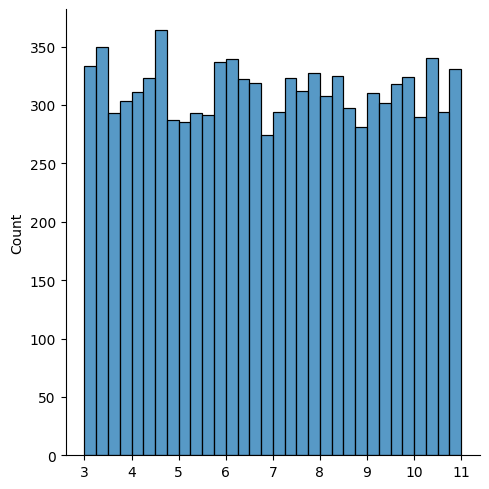

In [642]:
a=3
b=11

d1 = even_dist(a, b, N)
seaborn.displot(d1, bins=BINS)

### Экспоненциальное распределение

In [643]:
def exp_dist(l: int, n: int) -> list:
    dist = [0] * n
    for i in range(n):
        dist[i] = (-1) * math.log(R())/ l
    return dist 

### Тест

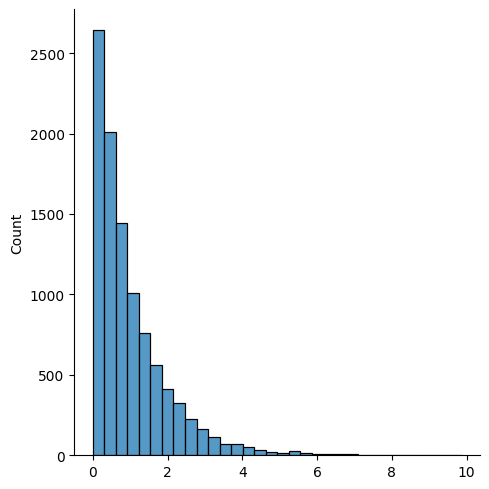

In [644]:
l=1

d2 = exp_dist(l, N)
seaborn.displot(d2, bins=BINS)

### Нормальное распределение

In [645]:
def norm_dist(m: int, s:int, n: int) -> list:
    dist = [0] * n
    for i in range(n):
        R12 = 0
        for j in range(12):
            R12 += R()
        dist[i] = m + s * (R12 - 6)
    return dist 

### Тест

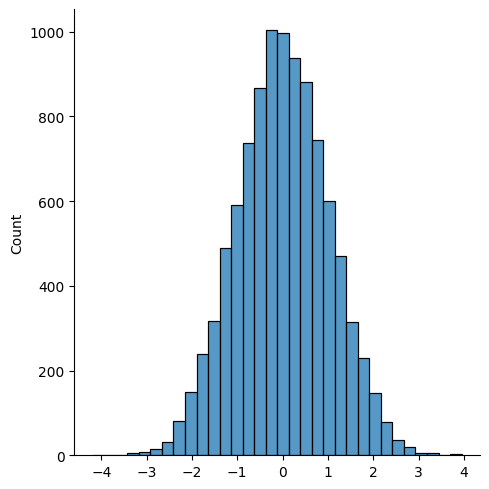

In [646]:
m=0
s=1

d3 = norm_dist(m, s, N)
seaborn.displot(d3, bins=BINS)

## Пункты 3.3, 3.4

### Функции, рассчитывающие мат. ожидание и дисперсию

In [647]:
def M(dist: list) -> float:
    return np.mean(dist)

def D(dist: list) -> float:
    return np.var(dist, ddof=1)

### Создание всех необходимых размеров выборок

In [648]:
n = 10
NS = [n]
while (n < N):
    n *= 2
    NS.append(int(n))
    n *= 2.5
    NS.append(int(n))
    n*=2
    NS.append(int(n))

# instead of
# NS = [10, 20, 50, 100, 200, 500, 1000...]

### Выборки, мат. ожидания, дисперсии, их действительные значения по всем трем распределениям dists...
Итого вспомогательная таблица **t, dists и true_t**

In [649]:
dists = [d1, d2, d3]
t = [[None for i in range(len(NS))] for j in range(len(dists) * 2)]

for i in range(len(dists)):
    for j in range(len(NS)):
        t[2*i][j] = M(random.choices(dists[i], k=NS[j]))
        t[2*i+1][j] = D(random.choices(dists[i], k=NS[j]))

true_t = [(a+b)/2, ((b-a)**2)/12, 1/l, 1/(l*l), m, s]

### Вывод красивой таблицы

In [650]:
table = []
dist_names = ['even', 'exp', 'norm']
for i in range(len(dists)):
    table.append([f'M({dist_names[i]}_dist)'] + t[2*i] + [true_t[2*i]])
    table.append([f'D({dist_names[i]}_dist)'] + t[2*i+1] + [true_t[2*i+1]])

h = ["dists | N(i)"] + NS + [True]
print(tabulate.tabulate(table, headers=h, tablefmt="fancy_grid", floatfmt=".3f"))

╒════════════════╤═══════╤═══════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤═════════╤════════╕
│ dists | N(i)   │    10 │    20 │     50 │    100 │    200 │    500 │   1000 │   2000 │   5000 │   10000 │   True │
╞════════════════╪═══════╪═══════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪═════════╪════════╡
│ M(even_dist)   │ 7.369 │ 7.201 │  6.776 │  7.267 │  6.842 │  6.855 │  7.000 │  6.887 │  6.893 │   7.012 │  7.000 │
├────────────────┼───────┼───────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼─────────┼────────┤
│ D(even_dist)   │ 7.201 │ 6.396 │  5.695 │  5.434 │  5.515 │  5.450 │  5.489 │  5.386 │  5.389 │   5.378 │  5.333 │
├────────────────┼───────┼───────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼─────────┼────────┤
│ M(exp_dist)    │ 0.622 │ 1.069 │  0.877 │  1.049 │  0.893 │  1.044 │  0.977 │  1.007 │  0.990 │   0.988 │  1.000 │
├────────────────┼───────┼───────┼────────┼────────┼────────┼───